## Language Detection

<b>Model Developed by </b><br>
Name: <b>Umair Ali</b> <br>
Contact: <b>+923480233673</b><br>
Email: <b>uape00@gmail.com</b><br>
Blog: <b>https://umair.dahielit.com</b><br>
GitHub: <b> https://github.com/1umairali/models</b>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
url = "https://raw.githubusercontent.com/1umairali/models/main/language_detection/language_detection_dataset.csv"
data = pd.read_csv(url)
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [3]:
df = data.copy()
df.sample(5)

,Text,language
21778,acanthopetalum subpatens är en mångfotingart s...,Swedish
10130,au fost mai multe discuții despre a o face pe ...,Romanian
12758,les arbitres du championnat de france sont ama...,French
17598,นนลนีย์ โอแกน มกราคม พศ ประเทศสหรัฐอเมริกา -...,Thai
17067,павлова г е фёдоров а с михаил васильевич ломо...,Russian


In [4]:
# check null values
df.isnull().sum()

Text        0
language    0
dtype: int64

In [5]:
# count values of each language
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

<BarContainer object of 22 artists>

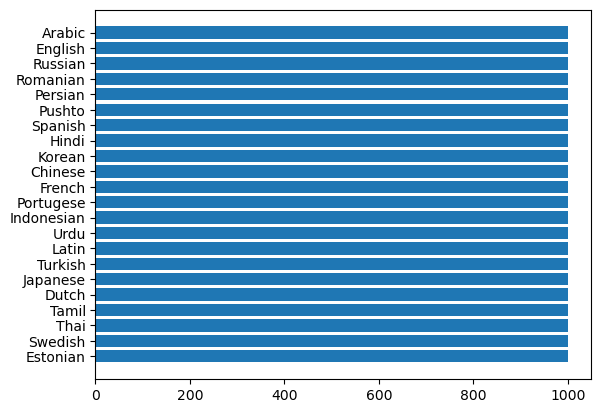

In [6]:
# show language values in plot
plt.barh(df['language'].unique(), df['language'].value_counts(sort=False).values)

## Split data into Train and Test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# assign data to train and test
x = df['Text']
y = df['language']

cv = CountVectorizer()
X = cv.fit_transform(x)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [9]:
X_train

<17600x277720 sparse matrix of type '<class 'numpy.int64'>'
	with 732016 stored elements in Compressed Sparse Row format>

In [10]:
X_test

<4400x277720 sparse matrix of type '<class 'numpy.int64'>'
	with 181582 stored elements in Compressed Sparse Row format>

In [11]:
y_train

5207         Thai
4450         Thai
7033      Swedish
487         Tamil
19537     Russian
           ...   
11964     Persian
21575     Spanish
5390      Turkish
860        Pushto
15795    Japanese
Name: language, Length: 17600, dtype: object

In [12]:
y_test

13035    Japanese
3115      Russian
8732        Latin
7591       Pushto
221         Hindi
           ...   
15215       Dutch
12321     Chinese
16643     English
10475      Pushto
9820        Dutch
Name: language, Length: 4400, dtype: object

## Model

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [15]:
model.score(X_test,y_test)

0.9529545454545455

## Test Model

In [16]:
user = input("Enter a Text & hit enter: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print('Language is ',output)

# Text sample for testing
###   Позже континенты воссоединились, образовав Паннотию    <------ Russian language text
###   चलो बाहर जाकर खाना खाते हैं   <------ Hindi language text
###   C'est un chien   <------ French language text


Enter a Text & hit enter: Позже континенты воссоединились
Language is  ['Russian']
